### Forescasting: S√©ries Temporais e Aprendizado de M√°quinas

### Introdu√ß√£o √†s S√©ries Temporais

Uma s√©rie temporal √© uma s√©rie de pontos de dados ordenados no tempo. Nesse tipo de an√°lise, o tempo √© uma sequ√™ncia de observa√ß√µes ou medidas coletadas em intervalos de tempo regulares ou irregularesm, registradas em ordem cronol√≥gica e associadas a momentos espec√≠ficos no tempo.

As s√©ries temporais est√£o presentes em diversas √°reas, e s√£o utilizadas para analisar e compreender o comportamento ao longo do tempo, identificar padr√µes, realizar previs√µes e tomar decis√µes baseadas em dados hist√≥ricos. 

<img src="https://drive.google.com/uc?id=1r-69dYMTZ3_IreXBBMDc7g9clQWXgh6D" width="700" align="center"/></img>


**Imagens:** √ìbitos Trimestral por c√¢ncer de pele entre 1996 e 2012. Nunes, V. et al.



#### Componentes de uma s√©rie temporal


As s√©ries temporais podem ser decompostas em diferentes componentes, que representam diferentes fontes de varia√ß√£o ou padr√µes presentes nos dados. A decomposi√ß√£o √© um processo que separa a s√©rie em componentes distintos, como tend√™ncia, sazonalidade e componentes residuais (ou irregulares). 

Os principais componentes de uma s√©rie temporal s√£o:

- **Tend√™ncia:** A tend√™ncia existe quando h√° um aumento ou diminui√ß√£o de longo prazo nos dados. Essa tend√™ncia n√£o precisa ser linear. Exemplo: Aumento da cobertura vacinal entre crian√ßas de 5 a 11 anos no Brasil.

<img src="https://drive.google.com/uc?id=1m5dSAXn6CVW1uNDBAn7fXFc_C0EYd7Se" width="500" align="center"/></img>

    Imagem: Observat√≥rio Covid-19 Fiocruz/Reprodu√ß√£o

- **Sazonalidade:** Ocorre quando uma s√©rie temporal √© afetada por fatores sazonais, como a √©poca do ano ou o dia da semana. √â uma frequ√™ncia fixa e conhecida. Exemplo: Aumento da venda de antibi√≥tico em um per√≠odo do ano.

<img src="https://drive.google.com/uc?id=1DyULG2d5lOw-lR42Obki-nuxjOFRtYdA" width="500" align="center"/></img>


    Imagem: Venda de Antibi√≥tico na Austr√°lia

- **Ciclo:** Quando os dados exibem aumentos e quedas que n√£o s√£o de uma frequ√™ncia fixa. Exemplo: A s√©rie apresenta uma forte sazonalidade dentro de cada ano, e um forte comportamento c√≠clico com um per√≠odo de 6 a 10 anos. 

<img src="https://drive.google.com/uc?id=10dDiiYvCUJN3pODQg9S00KvNeUc8ZTGG" width="500" align="center"/></img>

    Imagem: Vendas de novas casas para uma fam√≠lia  nos EUA


- **Componente Irregular ou Residual:** √© a varia√ß√£o n√£o explicada pelas tend√™ncias, sazonalidades e ciclos identificados anteriormente. √â a parte imprevis√≠vel da s√©rie temporal que n√£o pode ser atribu√≠da a padr√µes espec√≠ficos.

#### An√°lise explorat√≥ria de dados temporais

A an√°lise explorat√≥ria de uma s√©rie temporal envolve a investiga√ß√£o e compreens√£o dos padr√µes, tend√™ncias e caracter√≠sticas dos dados. Geralmente, na an√°lise explorat√≥ria utilizamos algumas etapas como:
- Estat√≠sticas Descritivas
- Identifica√ß√£o de Outliers
- Visualiza√ß√£o da s√©rie
- Identifica√ß√£o da Tend√™ncia
- An√°lise da Sazonalidade
- Estacionariedade
- Correla√ß√£o e Autocorrela√ß√µes

O objetivo principal dessa an√°lise √© explorar e compreender os padr√µes e caracter√≠sticas dos dados antes de seguir para t√©cnicas de modelagem ou previs√£o mais avan√ßadas.

##### S√©rie Temporal de a√ß√µes

In [68]:
#!pip install yahooquery
from yahooquery import Ticker

In [97]:
# Definir datas e tickers
inicio = '2000-01-01'
fim = '2023-07-10'
tickers = ['PETR4.SA','ITUB3.SA']

In [148]:
# Baixar hist√≥rico
bd = Ticker(tickers)
bd = bd.history(start=inicio,end=fim)
petr = bd.loc['PETR4.SA',:]

In [165]:
# Criar o gr√°fico de candlestick
config = {
    'x': petr.index,
    'open': petr.open,
    'close': petr.close,
    'high': petr.high,
    'low': petr.low,
    'type': 'candlestick',
    'showlegend': False
}
data = [config]
layout = go.Layout()
fig = go.Figure(data=data, 
                layout=layout)
fig.show()

#### Estacionariedade e transforma√ß√µes de s√©ries temporais

Se uma s√©rie temporal se comporta de forma aleat√≥ria ao longo do tempo e em torno de uma m√©dia constante, ela √© chamada de s√©rie estacion√°ria. Nesse tipo de s√©rie, as propriedades n√£o dependem do tempo em que a s√©rie √© observada.

S√©ries temporais com tend√™ncias, ou com sazonalidade, **n√£o s√£o estacion√°rias**, ou seja, a tend√™ncia e a sazonalidade afetar√£o o valor da s√©rie temporal em momentos diferentes.

<img src="https://drive.google.com/uc?id=1nH5nIuyAZedXW7pLgmFw0IJRx6M9GU3X" width="500" align="center"/></img>


Imagem: S√©rie Temporal Estacion√°ria


#### Identificando uma s√©rie estacion√°ria

Existem diversos testes estat√≠sticos que podem ser usados para verificar a estacionariedade de uma s√©rie temporal, um dos testes mais utilizados √© o Teste de Dickey-Fuller Aumentado. 

O Teste Dickey-Fuller √© utilizado para verificar se uma s√©rie temporal possui raiz unit√°ria, o que indica a presen√ßa de n√£o estacionariedade. 

A hip√≥tese nula (H0) do teste de Dickey-Fuller √© que a s√©rie possui raiz unit√°ria, e isso indica que a s√©rie n√£o √© estacion√°ria. A hip√≥tese alternativa (H1) indica que a s√©rie n√£o possui raiz unit√°ria, ou seja, a s√©rie √© estacion√°ria. Ao utilizar esse teste, podemos determinar se uma s√©rie requer diferencia√ß√£o para se tornar estacion√°ria antes de aplicar t√©cnicas de modelagem, como modelos ARIMA.

No mundo real, √© mais comum encontrarmos s√©ries n√£o estacion√°rias, como a s√©rie da cobertura vacinal de primeira dose da vacina contra o COVID-19 entre crian√ßas de 5 a 11 anos no Brasil.

<img src="https://drive.google.com/uc?id=1m5dSAXn6CVW1uNDBAn7fXFc_C0EYd7Se" width="500" align="center"/></img>

    Imagem: Observat√≥rio Covid-19 Fiocruz/Reprodu√ß√£o

Existe uma vasta literatura para ajustes de modelos de s√©rie estacion√°rias, vamos abordar os Modelos Autorregressivos (AR), onde a previs√£o futura depende do comportamento passado da pr√≥pria s√©rie, ou per√≠odos hist√≥ricos

In [340]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

##### S√©rie n√£o estacion√°ria

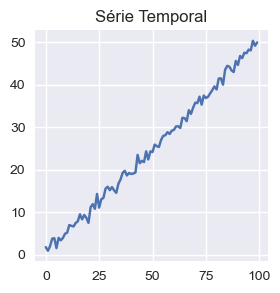

In [312]:
# Criar uma s√©rie temporal fict√≠cia N√£o Estacion√°ria
np.random.seed(0)
tempo = np.arange(0,100)
tendencia = 0.5 * tempo
serie = np.random.randn(100)+tendencia

#Gr√°fico
plt.figure(figsize=(3,3))
plt.plot(serie)
plt.title('S√©rie Temporal')
plt.show()

In [313]:
# Aplicar o teste de Dickey-Fuller Aumentado (ADF)
teste = adfuller(serie)

# Valor-p do teste
p_valor = teste[1]
print(f'p-valor: {p_valor}')

p-valor: 0.998736655331758


In [314]:
# Verificar a estacionariedade com valor-p
if p_valor < 0.05:
    print("A s√©rie √© estacion√°ria.")
else:
    print("A s√©rie n√£o √© estacion√°ria.")

A s√©rie n√£o √© estacion√°ria.


##### S√©rie Estacion√°ria

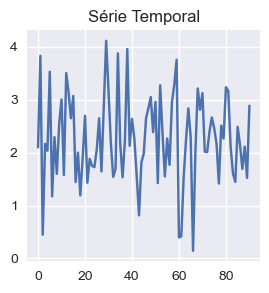

In [315]:
#Gerar s√©rie estacion√°ria
np.random.seed(1)
tamanho = 100
tempo = np.arange(tamanho)
tendencia = 0.5 * tempo
ruido = np.random.randn(tamanho) 
serie = tendencia + ruido

# Remover a m√©dia m√≥vel
janela = 10
media_movel = np.convolve(serie, np.ones(janela), 'valid') / janela
serie = serie[janela-1:] - media_movel

# Gr√°fico
plt.figure(figsize=(3,3))
plt.plot(serie)
plt.title('S√©rie Temporal')
plt.show()

In [316]:
# Aplicar o teste de Dickey-Fuller Aumentado (ADF)
teste = adfuller(serie)

# Valor-p do teste
p_valor = teste[1]
print(f'p-valor: {p_valor}')

p-valor: 5.175304397575759e-10


In [317]:
# Verificar a estacionariedade com valor-p
if p_valor < 0.05:
    print("A s√©rie √© estacion√°ria.")
else:
    print("A s√©rie n√£o √© estacion√°ria.")

A s√©rie √© estacion√°ria.


### Modelos de S√©ries Temporais Cl√°ssicos

Um modelo de s√©rie temporal cl√°ssico √© um modelo estat√≠stico amplamente utilizado para analisar, descrever e prever s√©ries temporais. Esses modelos t√™m uma estrutura bem definida e s√£o baseados em suposi√ß√µes e abordagens estat√≠sticas tradicionais.

Os modelos cl√°ssicos s√£o projetados para capturar caracter√≠sticas comuns encontradas em muitas s√©ries temporais, como tend√™ncias, sazonalidade e autocorrela√ß√£o. Eles s√£o fundamentados em teoria estat√≠stica e seguem princ√≠pios estabelecidos.

Os modelos mais comuns s√£o:
##### Modelo de M√©dia M√≥vel (MA)
Usado para capturar a influ√™ncia de choques ou ru√≠do aleat√≥rio passado na s√©rie temporal. Ele assume que o valor atual da s√©rie √© uma combina√ß√£o linear dos erros passados.
 
##### Modelo de M√©dia M√≥vel Autorregressiva (ARMA)
Esse modelo captura tanto a influ√™ncia dos erros passados quanto a depend√™ncia dos pr√≥prios valores passados da s√©rie.

##### Modelo de M√©dia M√≥vel Autorregressiva com Termos de Diferencia√ß√£o (ARIMA)
√â uma extens√£o do modelo ARMA que incorpora a diferencia√ß√£o dos valores da s√©rie para torn√°-la estacion√°ria

##### Modelo de M√©dia M√≥vel Autorregressiva com Termos de Diferencia√ß√£o e Componentes Sazonais (SARIMA)
Esse modelo incorpora componentes sazonais na modelagem de s√©ries temporais. Ele √© adequado para s√©ries que exibem padr√µes sazonais.

##### Modelo de Suaviza√ß√£o Exponencial (ES)
S√£o usados para modelar s√©ries temporais com base em combina√ß√µes ponderadas de observa√ß√µes passadas.


### Metodologia Box & Jenkins

O m√©todo Box-Jenkins, tamb√©m conhecida como abordagem Box-Jenkins, √© uma abordagem sistem√°tica e iterativa, em que os modelos s√£o refinados e ajustados conforme necess√°rio. Esse m√©todo foi desenvolvido por George Box e Gwilym Jenkins na d√©cada de 70 e √© um dos m√©todos mais utilizados para modelagem de s√©ries temporais.

Esse abordagem se concentra em tr√™s etapas principais: identifica√ß√£o, estimativa e diagn√≥stico, que podem ser resumidas em:


**Identifica√ß√£o:** Nesta etapa, o objetivo √© identificar a ordem adequada do modelo ARIMA (Autoregressive Integrated Moving Average) para a s√©rie temporal. Isso √© feito analisando os gr√°ficos de autocorrela√ß√£o (ACF) e autocorrela√ß√£o parcial (PACF) da s√©rie. A an√°lise desses gr√°ficos ajuda a determinar a presen√ßa de componentes autorregressivos (AR) e de m√©dia m√≥vel (MA) na s√©rie, o que ajuda a selecionar os valores apropriados para os par√¢metros do modelo ARIMA (p, d, q).

**Estima√ß√£o:** Nesta etapa, o modelo ARIMA √© ajustado aos dados da s√©rie temporal. Os par√¢metros do modelo s√£o estimados usando m√©todos estat√≠sticos, como a m√°xima verossimilhan√ßa, que procuram encontrar os valores que melhor se ajustam aos dados observados.

**Diagn√≥stico:** Ap√≥s a estima√ß√£o do modelo, √© importante realizar um diagn√≥stico para verificar se o modelo √© adequado. Isso envolve analisar os res√≠duos do modelo, que s√£o os erros entre as previs√µes do modelo e os valores reais da s√©rie temporal. Os res√≠duos devem ser estacion√°rios, n√£o mostrando padr√µes significativos nos gr√°ficos de autocorrela√ß√£o e autocorrela√ß√£o parcial. Diversos testes estat√≠sticos podem ser aplicados para verificar a aleatoriedade e a normalidade dos res√≠duos.


### Modelos de m√©dia m√≥vel (MA)

Os modelos de m√©dia m√≥vel s√£o amplamente utilizados para prever valores futuros com base em m√©dias de observa√ß√µes passadas. Os modelos de m√©dia m√≥vel s√£o denotados como MA(q), onde "MA" significa m√©dia m√≥vel e "q" representa a ordem do modelo. A ordem do modelo (q) indica o n√∫mero de termos de m√©dia m√≥vel inclu√≠dos no modelo. Cada termo de m√©dia m√≥vel √© uma combina√ß√£o linear dos erros passados da s√©rie temporal.

A ideia principal desse modelo √© capturar padr√µes ou componentes de ru√≠do aleat√≥rio que n√£o podem ser explicados pelos termos de m√©dia m√≥vel anteriores. O modelo de m√©dia m√≥vel considera que cada observa√ß√£o da s√©rie temporal √© uma combina√ß√£o linear dos termos de m√©dia m√≥vel e um termo de erro aleat√≥rio.

Por exemplo, um modelo de m√©dia m√≥vel de ordem 1, MA(1), pode ser expresso da seguinte forma: y(t) = c + Œµ(t) + Œ∏‚ÇÅŒµ(t-1)

onde: 

 - y(t) √© o valor da s√©rie temporal no tempo "t"
 - c √© uma constante
 - Œµ(t) √© o erro aleat√≥rio no tempo "t"
 - Œ∏‚ÇÅ √© o coeficiente que multiplica o erro no tempo "t-1"
 
 
Os modelos de m√©dia m√≥vel s√£o √∫teis para capturar componentes de curto prazo em uma s√©rie temporal, como choques ou varia√ß√µes r√°pidas. Eles s√£o eficazes quando a s√©rie temporal n√£o exibe tend√™ncias ou padr√µes de sazonalidade significativos.

O modelo de M√©dia M√≥vel (MA) t√™m um n√∫mero infinito de classes, pois a ordem do modelo pode ser qualquer n√∫mero inteiro n√£o negativo. Um modelo denotado como MA(q), onde "q" determina o n√∫mero de termos de m√©dia m√≥vel inclu√≠dos no modelo.

Por exemplo:
- MA(1) possui um termo de m√©dia m√≥vel.
- MA(2) possui dois termos de m√©dia m√≥vel.
- MA(q) possui "q" termos de m√©dia m√≥vel.


##### M√©dias m√≥veis no Python
Para esse exemplo, vamos utilizar a base de precipita√ß√£o mensal acumulada da cidade de Barcelona desde 1786. A precipita√ß√£o √© fornecida em mil√≠metros (mm).

A base pode encontrada em: [barcelona.cat](https://opendata-ajuntament.barcelona.cat/data/en/dataset/precipitacio-hist-bcn)

In [590]:
# Carregar Base de Dados
base = pd.read_csv('precipitacionsbarcelonadesde1786.csv')

In [591]:
base.head()

Any  Precip_Acum_Gener  Precip_Acum_Febrer  Precip_Acum_Marc  \
0  1786               32.8                28.4              84.4   
1  1787              136.4                27.4              44.6   
2  1788                9.9                14.9              32.2   
3  1789               12.4                12.4              23.6   
4  1790               44.6                 1.2             188.5   

   Precip_Acum_Abril  Precip_Acum_Maig  Precip_Acum_Juny  Precip_Acum_Juliol  \
0               42.3               8.5              38.0                 6.8   
1               76.9               0.0              29.8                34.7   
2               12.4               7.5             146.3                59.4   
3                9.9              32.2               9.9                 6.3   
4               74.4              44.7              39.7                65.7   

   Precip_Acum_Agost  Precip_Acum_Setembre  Precip_Acum_Octubre  \
0               52.1                  62.0                 57.0   
1               14.9                 205.8                 12.4   
2               29.8                 123.9                163.6   
3               69.4                  18.7                 52.1   
4               32.3                  71.9                205.8   

   Precip_Acum_Novembre  Precip_Acum_Desembre  
0                 195.8                 114.1  
1                  42.2                   0.0  
2                 106.6                  22.3  
3                  18.7                  76.9  
4                  72.0                  14.9

In [592]:
# Definir a coluna ano como √≠ndice
base.set_index('Any',inplace=True)

In [593]:
# Alterar o nome do √≠ndice de Any para ano
base.index.name = 'ano'

In [594]:
# Cada coluna representa a precipita√ß√£o acumulada do m√™s. Vamos somar e obter o acumulado anual
base['Chuva_Acumulada'] = base.sum(axis=1)
base = base[['Chuva_Acumulada']]

In [483]:
base.head()

Chuva_Acumulada
ano                  
1786            722.2
1787            625.1
1788            728.8
1789            342.5
1790            855.7

##### Visualiza√ß√£o Gr√°fica

In [484]:
import matplotlib.pyplot as plt

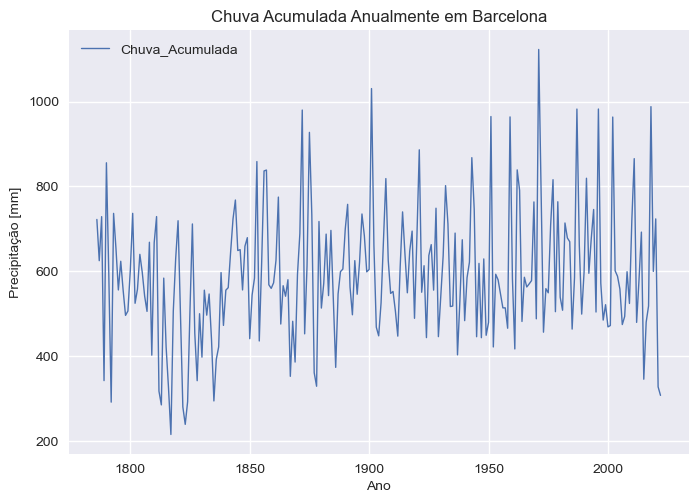

In [485]:
plt.style.use('seaborn')

base.plot(linewidth=1)

plt.title('Chuva Acumulada Anualmente em Barcelona')
plt.xlabel('Ano', fontsize=10)
plt.ylabel('Precipita√ß√£o [mm]', fontsize=10)
plt.show()

In [486]:
pd.options.mode.chained_assignment = None

In [487]:
# Visualizar a m√©dia m√≥vel para 10 anos
base['MA_10'] = base.Chuva_Acumulada.rolling(10, min_periods=1).mean()

In [488]:
# Visualizar a m√©dia m√≥vel para 20 anos
base['MA_20'] = base.Chuva_Acumulada.rolling(20, min_periods=1).mean()

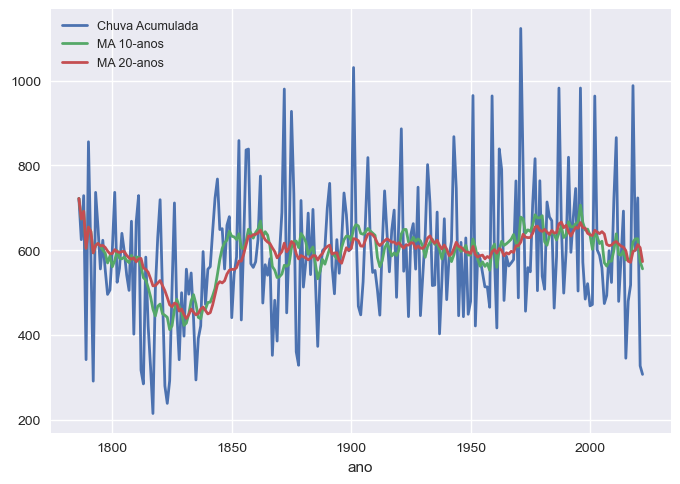

In [489]:
#Gr√°fico
base.plot(linewidth=2)

plt.legend(labels =['Chuva Acumulada', 'MA 10-anos', 'MA 20-anos'], fontsize=9)
plt.show()

In [490]:
# Previs√£o para o pr√≥ximo ano
ultimo_valor = base['MA_10'].iloc[-1]

In [491]:
ultimo_valor

556.3599999999999

### Modelos autorregressivos (AR)

Em um modelo de regress√£o m√∫ltipla, prevemos a vari√°vel de interesse usando uma combina√ß√£o linear de preditores. 

$\hat y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_pX_p$

Em um modelo de autorregress√£o (AR), prevemos a vari√°vel de interesse usando uma combina√ß√£o linear de valores passados da vari√°vel. Por exemplo: o valor da s√©rie no tempo t depende do que aconteceu, por exemplo, t-1, t-2, t-3, etc.

$Y(t) = \beta_0 + \beta_1 Y(t-1) + \beta_2 Y(t-2) + \ldots + \beta_p Y(t-p) + Œµ(t)$

onde:

- Y(t) √© o valor da s√©rie temporal no per√≠odo t,
- ùõΩ0 √© uma constante (ou intercepto),
- ùõΩ1, ùõΩ2, ..., ùõΩp s√£o os coeficientes dos termos autoregressivos,
- Y(t-1), Y(t-2), ..., Y(t-p) s√£o os valores anteriores da s√©rie temporal considerados na previs√£o,
- Œµ(t) √© o termo de erro (ou res√≠duo) aleat√≥rio no per√≠odo t.


Em um modelo autoregressivo, a previs√£o de um valor em um determinado momento depende de uma combina√ß√£o linear dos valores anteriores da s√©rie temporal. 

Um modelo AR de ordem p √© denotado como AR(p).A ordem do modelo autoregressivo especifica o n√∫mero de valores anteriores considerados na previs√£o. Cada termo autoregressivo √© multiplicado por um coeficiente que determina o peso do valor anterior na previs√£o.

A ordem do modelo (p) determina o n√∫mero de termos anteriores que s√£o levados em considera√ß√£o na previs√£o. Quanto maior o valor de p, maior √© a depend√™ncia temporal dos valores anteriores na previs√£o.

#### Autocorrela√ß√£o

Autocorrela√ß√£o √© uma medida estat√≠stica que quantifica o grau de correla√ß√£o entre uma s√©rie temporal e suas vers√µes atrasadas, ou seja, indica como os valores passados de uma s√©rie temporal est√£o relacionados entre si.

Existem v√°rias maneiras de calcular a autocorrela√ß√£o, sendo uma das mais utilizadas a fun√ß√£o de autocorrela√ß√£o (ACF), que mede a correla√ß√£o entre um valor da s√©rie temporal e seus valores anteriores em diferentes lags. A ACF √© uma medida de autocorrela√ß√£o de primeira ordem.

A autocorrela√ß√£o pode assumir valores entre -1 e 1. Um valor positivo pr√≥ximo de 1 indica uma forte correla√ß√£o positiva. Um valor negativo pr√≥ximo de -1 indica uma forte correla√ß√£o negativa. Um valor pr√≥ximo de 0 indica aus√™ncia de correla√ß√£o linear.

##### Verificar rapidamente se h√° correla√ß√£o

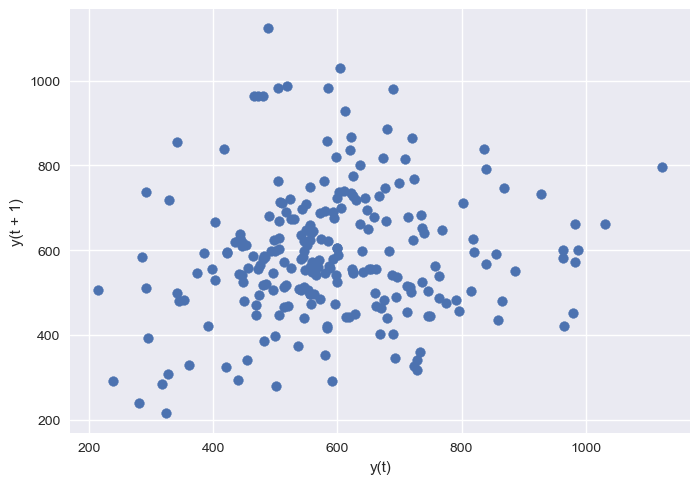

In [492]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(base['Chuva_Acumulada'],lag=1)
pyplot.show()

#### Gr√°ficos ACF e PACF

In [493]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

O ACF e PACF s√£o duas fun√ß√µes importantes: a fun√ß√£o de autocorrela√ß√£o (ACF) e a fun√ß√£o de autocorrela√ß√£o parcial (PACF). Essas fun√ß√µes s√£o usadas para entender a rela√ß√£o entre os valores de uma s√©rie temporal e seus valores passados (lags).

**Fun√ß√£o de Autocorrela√ß√£o (ACF):**
Mede a correla√ß√£o entre um valor em um determinado lag (atraso) e os valores anteriores da s√©rie temporal. De forma bem simples, a ACF mede como os valores passados est√£o correlacionados com o valor atual da s√©rie.

O gr√°fico da ACF exibe a correla√ß√£o em diferentes lags, com o eixo horizontal representando os lags e o eixo vertical representando os valores da correla√ß√£o. A ACF pode ajudar a identificar padr√µes de depend√™ncia temporal, como sazonalidade ou autocorrela√ß√£o significativa em lags espec√≠ficos.

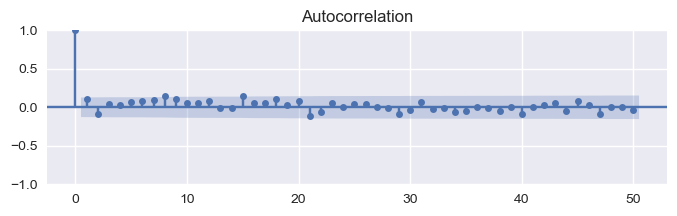

In [494]:
fig, ax = plt.subplots(figsize=(8,2))
plot_acf(base['Chuva_Acumulada'], lags=50, ax=ax)
plt.show()

**Fun√ß√£o de Autocorrela√ß√£o Parcial (PACF):**
A fun√ß√£o de autocorrela√ß√£o parcial (PACF) mede a correla√ß√£o entre um valor em um determinado lag (atraso) e os valores anteriores da s√©rie temporal, excluindo a influ√™ncia dos lags intermedi√°rios. De forma simples, a PACF mede a correla√ß√£o direta entre um valor e seus lags anteriores, eliminando o efeito dos lags intermedi√°rios.

O gr√°fico da PACF exibe a correla√ß√£o parcial em diferentes lags, com o eixo horizontal representando os lags e o eixo vertical representando os valores da correla√ß√£o parcial. A PACF pode ajudar a identificar os lags mais relevantes e significativos para a modelagem da s√©rie temporal, ajudando a determinar a ordem de modelos autorregressivos (AR).

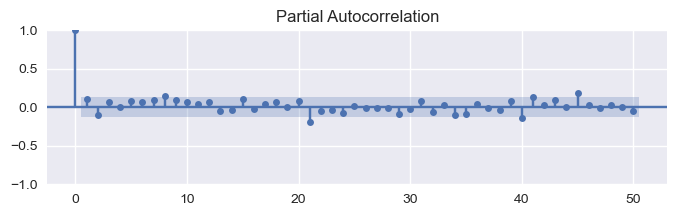

In [496]:
fig, ax = plt.subplots(figsize=(8,2))
plot_pacf(base['Chuva_Acumulada'], lags=50, ax=ax)
plt.show()

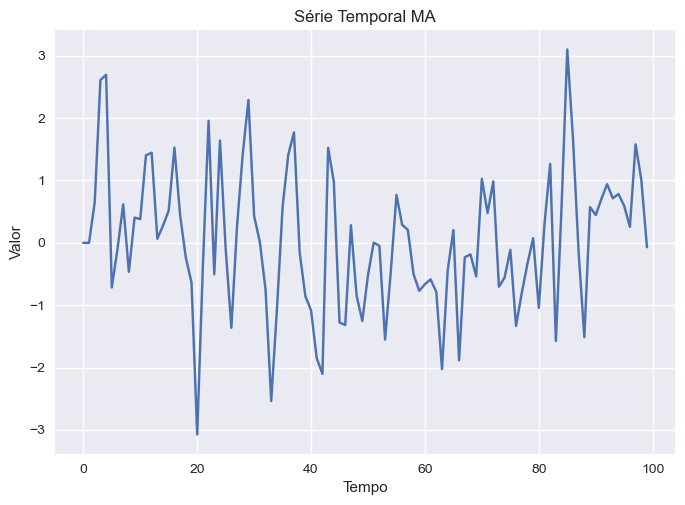

In [497]:
import numpy as np
import matplotlib.pyplot as plt

# Par√¢metros do modelo MA
order = 2
coefficients = [0.5, -0.3]  # Coeficientes do modelo MA

# Simula√ß√£o da s√©rie MA
np.random.seed(0)
n_samples = 100  # N√∫mero de amostras
epsilon = np.random.normal(0, 1, n_samples)
ma_series = np.zeros(n_samples)

for i in range(order, n_samples):
    ma_series[i] = epsilon[i] + coefficients[0] * epsilon[i-1] + coefficients[1] * epsilon[i-2]

# Plot da s√©rie MA
plt.plot(ma_series)
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.title('S√©rie Temporal MA')
plt.show()

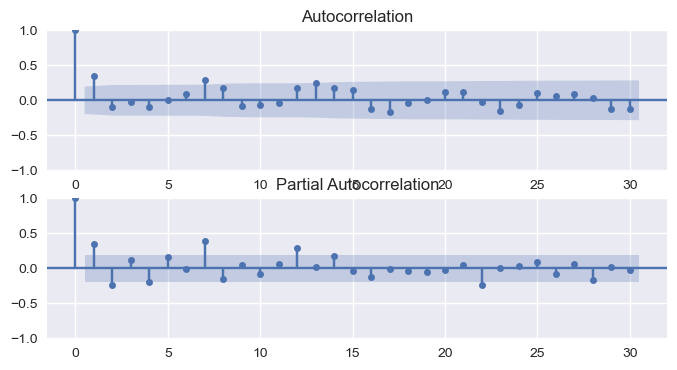

In [498]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(8,4))
plot_acf(ma_series, lags=30, ax=ax[0])
plot_pacf(ma_series, lags=30, ax=ax[1])

plt.show()

##### Como interpretar o ACF e PACF

<table>
<thead>
  <tr>
    <th></th>
    <th>AR(p)</th>
    <th>MA(q)</th>
    <th>ARMA(p, q)</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>ACF</td>
    <td>Diminui (Decad√™ncia geom√©trica)</td>
    <td>Significativo em cada lag q / Cai ap√≥s o lag q</td>
    <td>Diminui (Decad√™ncia geom√©trica)</td>
  </tr>
  <tr>
    <td>PACF</td>
    <td>Significativo em cada lag p / Cai ap√≥s o lag p</td>
    <td>Diminui (Decad√™ncia geom√©trica)</td>
    <td>Diminui (Decad√™ncia geom√©trica)</td>
  </tr>
</tbody>
</table>

_Tabela Extra√≠da Kaggle: [Time Series: Interpreting ACF and PACF](https://www.kaggle.com/code/iamleonie/time-series-interpreting-acf-and-pacf#Fundamentals)_

A identifica√ß√£o se um modelo √© de m√©dia m√≥vel (MA) ou autorregressivo (AR) pode ser realizada por meio da an√°lise dos gr√°ficos da fun√ß√£o de autocorrela√ß√£o (ACF) e da fun√ß√£o de autocorrela√ß√£o parcial (PACF). 

Esses gr√°ficos fornecem informa√ß√µes sobre a depend√™ncia temporal presente na s√©rie temporal e ajudam a determinar a ordem adequada do modelo.

Temos alguns passos para identificar se um modelo √© MA ou AR com base na an√°lise dos gr√°ficos da ACF e PACF:

**Modelo de M√©dia M√≥vel (MA):** 
- **ACF:** No gr√°fico da ACF, se a autocorrela√ß√£o diminui rapidamente e se torna insignificante ap√≥s alguns lags, enquanto a autocorrela√ß√£o parcial n√£o mostra uma queda abrupta, isso pode indicar um modelo MA. Em um modelo MA, a ACF geralmente tem um decaimento exponencial ou senoidal.
- **PACF:** No gr√°fico da PACF, se a autocorrela√ß√£o parcial mostra uma queda abrupta ap√≥s alguns lags, enquanto a autocorrela√ß√£o permanece significativa em v√°rios lags, isso pode indicar um modelo MA. A PACF de um modelo MA tende a se tornar zero ap√≥s a ordem do modelo.


**Modelo Autorregressivo (AR):**
- **ACF:** No gr√°fico da ACF, se a autocorrela√ß√£o diminui gradualmente √† medida que os lags aumentam, isso pode indicar um modelo AR. Em um modelo AR, a ACF diminui lentamente, mostrando uma autocorrela√ß√£o significativa em v√°rios lags.
- **PACF:** No gr√°fico da PACF, se a autocorrela√ß√£o parcial diminui ap√≥s alguns lags e se torna insignificante ap√≥s alguns lags, isso pode indicar um modelo AR. A PACF de um modelo AR geralmente diminui abruptamente ap√≥s a ordem do modelo.


√â importante ressaltar que a interpreta√ß√£o dos gr√°ficos da ACF e PACF √© uma indica√ß√£o inicial e n√£o √© uma regra r√≠gida. A an√°lise deve ser complementada com outros m√©todos de sele√ß√£o de modelo, como crit√©rios de informa√ß√£o (por exemplo, AIC ou BIC) e avalia√ß√£o de res√≠duos, para garantir uma sele√ß√£o adequada do modelo.

In [499]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg

In [500]:
# Treinamento e Teste
#ultimos_anos = base.index[-5:]
#test = base.loc[ultimos_anos]
#train = base.loc[~base.index.isin(ultimos_anos)]

In [568]:
ar_modelo = AutoReg(base[['Chuva_Acumulada']], lags=2).fit()

C:\Users\ander\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



In [569]:
ar_modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:        Chuva_Acumulada   No. Observations:                  237
Model:                     AutoReg(2)   Log Likelihood               -1515.599
Method:               Conditional MLE   S.D. of innovations            152.997
Date:                Wed, 12 Jul 2023   AIC                           3039.199
Time:                        01:33:19   BIC                           3053.037
Sample:                             2   HQIC                          3044.778
                                  237                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                576.3261     52.875     10.900      0.000     472.692     679.960
Chuva_Acumulada.L1     0.1247      0.065      1.909      0.056      -0.003       0.253
Chuva_Acumulada.L2    -0.1013      0.066     -1.545      0.122      -0.230       0.027
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6151           -3.0806j            3.1414           -0.2186
AR.2            0.6151           +3.0806j            3.1414            0.2186
-----------------------------------------------------------------------------
"""

In [571]:
pred = ar_modelo.predict(start=len(base), end=len(base)+5, dynamic=False)

C:\Users\ander\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [572]:
pred

237    581.464949
238    617.626928
239    594.393562
240    587.833140
241    589.369645
242    590.225951
dtype: float64

### Modelos MA

In [554]:
import statsmodels.api as sm

In [584]:
modelo_ma = sm.tsa.arima.ARIMA(base[['Chuva_Acumulada']], order=(0,0,1)) # Ordem do modelo MA (p, d, q)

resultado_ma = modelo_ma.fit()

C:\Users\ander\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\ander\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\ander\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



In [586]:
print(resultado_ma.summary())

                               SARIMAX Results                                
Dep. Variable:        Chuva_Acumulada   No. Observations:                  237
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1528.681
Date:                Wed, 12 Jul 2023   AIC                           3063.362
Time:                        01:41:59   BIC                           3073.766
Sample:                             0   HQIC                          3067.556
                                - 237                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        590.6515     12.204     48.398      0.000     566.732     614.571
ma.L1          0.1443      0.067      2.168      0.030       0.014       0.275
sigma2      2.336e+04   1945.466     12.008      0.0

In [587]:
previsoes = resultado_ma.predict(start=len(base), end=len(base)+5)  # Previs√£o para os pr√≥ximos 5 per√≠odos

C:\Users\ander\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [588]:
print(previsoes)

237    555.720026
238    590.651456
239    590.651456
240    590.651456
241    590.651456
242    590.651456
Name: predicted_mean, dtype: float64


### Modelos ARMA

O modelo ARMA (Autoregressive Moving Average) combina componentes autorregressivos (AR) e de m√©dia m√≥vel (MA) em um √∫nico modelo para capturar a estrutura de depend√™ncia temporal dos dados.

Ao combinar os componentes AR e MA, o modelo ARMA √© capaz de capturar tanto a depend√™ncia dos valores passados quanto a influ√™ncia dos erros residuais passados na s√©rie temporal.

A ordem de um modelo ARMA √© especificada como (p, q), onde p √© a ordem do componente autorregressivo (AR) e q √© a ordem do componente de m√©dia m√≥vel (MA). Por exemplo, um modelo ARMA(1, 1) possui um termo autorregressivo de ordem 1 e um termo de m√©dia m√≥vel de ordem 1.

In [589]:
modelo_ma = sm.tsa.arima.ARIMA(base[['Chuva_Acumulada']], order=(0,1,1)) # Ordem do modelo MA (p, d, q)

resultado_ma = modelo_ma.fit()

C:\Users\ander\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\ander\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\ander\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



### An√°lise Explorat√≥ria de Dados

In [21]:
#!pip install ydata_profiling

In [25]:
import pandas as pd
from ydata_profiling.visualisation.plot import timeseries_heatmap
from ydata_profiling import ProfileReport

In [10]:
#https://www.kaggle.com/datasets/sogun3/uspollution
base = pd.read_csv('pollution_us_2000_2016.csv', index_col=[0])

In [11]:
base.head()

State Code  County Code  Site Num                                  Address  \
0           4           13      3002  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN   
1           4           13      3002  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN   
2           4           13      3002  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN   
3           4           13      3002  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN   
4           4           13      3002  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN   

     State    County     City  Date Local          NO2 Units   NO2 Mean  ...  \
0  Arizona  Maricopa  Phoenix  2000-01-01  Parts per billion  19.041667  ...   
1  Arizona  Maricopa  Phoenix  2000-01-01  Parts per billion  19.041667  ...   
2  Arizona  Maricopa  Phoenix  2000-01-01  Parts per billion  19.041667  ...   
3  Arizona  Maricopa  Phoenix  2000-01-01  Parts per billion  19.041667  ...   
4  Arizona  Maricopa  Phoenix  2000-01-02  Parts per billion  22.958333  ...   

           SO2 Units  SO2 Mean  SO2 1st Max Value SO2 1st Max Hour  SO2 AQI  \
0  Parts per billion  3.000000                9.0               21     13.0   
1  Parts per billion  3.000000                9.0               21     13.0   
2  Parts per billion  2.975000                6.6               23      NaN   
3  Parts per billion  2.975000                6.6               23      NaN   
4  Parts per billion  1.958333                3.0               22      4.0   

            CO Units   CO Mean  CO 1st Max Value CO 1st Max Hour  CO AQI  
0  Parts per million  1.145833               4.2              21     NaN  
1  Parts per million  0.878947               2.2              23    25.0  
2  Parts per million  1.145833               4.2              21     NaN  
3  Parts per million  0.878947               2.2              23    25.0  
4  Parts per million  0.850000               1.6              23     NaN  

[5 rows x 28 columns]

In [12]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1746661 entries, 0 to 24603
Data columns (total 28 columns):
 #   Column             Dtype  
---  ------             -----  
 0   State Code         int64  
 1   County Code        int64  
 2   Site Num           int64  
 3   Address            object 
 4   State              object 
 5   County             object 
 6   City               object 
 7   Date Local         object 
 8   NO2 Units          object 
 9   NO2 Mean           float64
 10  NO2 1st Max Value  float64
 11  NO2 1st Max Hour   int64  
 12  NO2 AQI            int64  
 13  O3 Units           object 
 14  O3 Mean            float64
 15  O3 1st Max Value   float64
 16  O3 1st Max Hour    int64  
 17  O3 AQI             int64  
 18  SO2 Units          object 
 19  SO2 Mean           float64
 20  SO2 1st Max Value  float64
 21  SO2 1st Max Hour   int64  
 22  SO2 AQI            float64
 23  CO Units           object 
 24  CO Mean            float64
 25  CO 1st Max Value   f

In [13]:
base = base[base['State']=='New York']
base['Date Local'] = pd.to_datetime(base['Date Local'])

In [14]:
filtrada = base[['Date Local','Site Num','County','NO2 Mean','O3 AQI','CO AQI']]

In [16]:
perfil = ProfileReport(filtrada, 
                       tsmode=True, 
                       sortby="Date Local",
                       minimal=True
                      )
perfil.to_file('relatorio.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Anexo

### Algoritmos de regress√£o para s√©ries temporais

**Regress√£o Linear:** √â um m√©todo simples que estabelece uma rela√ß√£o linear entre as vari√°veis dependentes e independentes. Pode ser usado para prever valores futuros em uma s√©rie temporal.

**Regress√£o de √Årvore de Decis√£o:** Utiliza uma estrutura de √°rvore para dividir os dados em subconjuntos com base em condi√ß√µes espec√≠ficas. Pode ser aplicado a s√©ries temporais para previs√µes.

**Random Forest:** √â um conjunto de √°rvores de decis√£o que trabalham em conjunto para realizar previs√µes. Pode ser eficaz em lidar com a natureza complexa e n√£o linear das s√©ries temporais.

**Regress√£o de Vetor de Suporte (SVR):** √â uma extens√£o do algoritmo de m√°quina de vetores de suporte (SVM) para problemas de regress√£o. Pode ser aplicado a s√©ries temporais para prever valores futuros.

**Regress√£o por Processo Gaussiano (GPR):** √â um modelo probabil√≠stico que assume uma distribui√ß√£o gaussiana sobre os dados. Pode ser usado para fazer previs√µes em s√©ries temporais, capturando a incerteza associada √†s previs√µes.

**Redes Neurais Artificiais (NNA):** As redes neurais podem ser usadas para modelar rela√ß√µes complexas em s√©ries temporais. As arquiteturas comuns incluem redes neurais de alimenta√ß√£o direta (feedforward) e redes neurais recorrentes (RNNs), como as LSTM (Long Short-Term Memory), que s√£o especialmente adequadas para lidar com depend√™ncias temporais.

**Gradient Boosting:** Algoritmos de gradient boosting, como Gradient Boosted Trees (GBT) ou XGBoost, podem ser usados para prever s√©ries temporais, combinando v√°rias √°rvores de decis√£o.

### Algoritmos de classifica√ß√£o para s√©ries temporais

**k-Nearest Neighbors (k-NN):** O algoritmo k-NN pode ser aplicado a s√©ries temporais por meio da defini√ß√£o de uma m√©trica apropriada para medir a similaridade entre as s√©ries. A classifica√ß√£o √© feita com base nas classes dos vizinhos mais pr√≥ximos.

**Support Vector Machines (SVM):** As m√°quinas de vetores de suporte tamb√©m podem ser usadas para classificar s√©ries temporais. Nesse caso, √© necess√°rio definir uma representa√ß√£o apropriada para as s√©ries, como por meio de extra√ß√£o de caracter√≠sticas (por exemplo, extra√ß√£o de caracter√≠sticas de Fourier) ou usando kernels especializados para s√©ries temporais.

**Redes Neurais Recorrentes (RNNs):** As RNNs, como as LSTM, podem ser usadas para classificar s√©ries temporais. Elas s√£o capazes de modelar depend√™ncias temporais complexas e t√™m sido eficazes em v√°rias tarefas de classifica√ß√£o em s√©ries temporais.

**Dynamic Time Warping (DTW):** O DTW √© um algoritmo que compara duas s√©ries temporais levando em considera√ß√£o deslocamentos e deforma√ß√µes temporais. Pode ser usado para classifica√ß√£o ao encontrar a s√©rie mais semelhante em um conjunto de treinamento.

**Hidden Markov Models (HMMs):** Os HMMs s√£o modelos probabil√≠sticos usados para modelar sequ√™ncias de observa√ß√µes. Eles podem ser aplicados a s√©ries temporais para classifica√ß√£o, assumindo que as observa√ß√µes s√£o geradas por diferentes estados ocultos.

**Random Forests e Gradient Boosting:** Embora esses algoritmos sejam mais comumente associados √† tarefa de regress√£o, eles tamb√©m podem ser adaptados para realizar classifica√ß√£o em s√©ries temporais. O princ√≠pio √© semelhante ao usado em dados n√£o temporais, mas a representa√ß√£o e a considera√ß√£o das depend√™ncias temporais devem ser tratadas adequadamente.

√â importante ressaltar que a classifica√ß√£o em s√©ries temporais pode apresentar desafios adicionais em compara√ß√£o com dados n√£o temporais devido √† natureza sequencial e √† depend√™ncia temporal. Portanto, √© necess√°rio considerar cuidadosamente o algoritmo e a abordagem adequados ao lidar com s√©ries temporais para tarefas de classifica√ß√£o.


https://ydata-profiling.ydata.ai/docs/master/pages/advanced_usage/available_settings.html

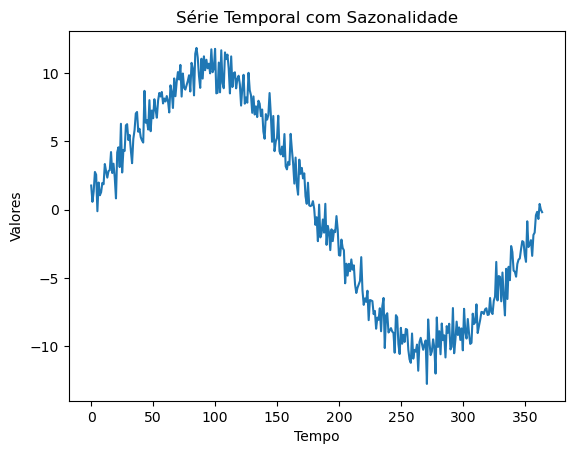

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Gerando a s√©rie temporal com sazonalidade
np.random.seed(0)
t = np.arange(0, 365)
seasonality = 10 * np.sin(2 * np.pi * t / 365)
data = np.random.randn(365) + seasonality

# Plot da s√©rie temporal com sazonalidade
plt.plot(t, data)

# Configura√ß√µes do eixo x (tempo)
plt.xlabel('Tempo')

# Configura√ß√µes do eixo y (valores da s√©rie)
plt.ylabel('Valores')

# T√≠tulo do gr√°fico
plt.title('S√©rie Temporal com Sazonalidade')

# Exibi√ß√£o do gr√°fico
plt.show()